In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../data/heart_disease_clean.csv")

X = df.drop(columns=['target'])
y = df['target']

In [3]:
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=0.95, random_state=42)  # keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("PCA components kept:", X_pca.shape[1])

Original features: 13
PCA components kept: 12


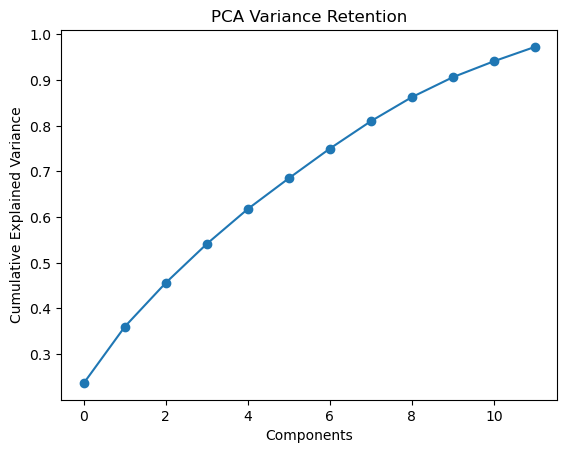

In [4]:
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Retention")
plt.show()

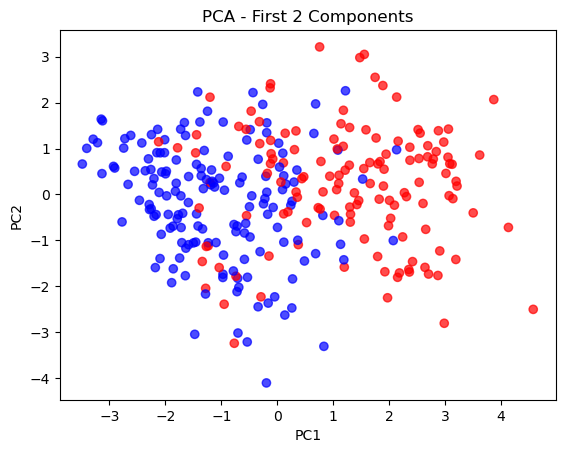

In [5]:
if X_pca.shape[1] >= 2:
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='bwr', alpha=0.7)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA - First 2 Components")
    plt.show()

In [6]:
pd.DataFrame(X_pca).to_csv("../results/pca_transformed.csv", index=False)